First, let's import the libraries

In [3]:
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

Initialize the number of the population, the $\phi$ parameter and the value of $\sigma_{\eta}$ and $\sigma_{\epsilon}$ suggested in the point a

In [4]:
n = 300
phi = 0.8

Let's make a loop where we generate the data, define the AR(1) plus noise model $\\$
        $y_t = \mu_t + \epsilon_t $ $\\$
        $\mu_{t+1} = \phi\mu_t +\eta_t$ $\\$
and then we run the Kalman filter for the different pair of values defined in the request


The sum of the likelihood with the values of sigmas (0.1, 1) is -74.6583
The sum of the likelihood with the values of sigmas (1, 1) is -175.5721
The sum of the likelihood with the values of sigmas (1, 0.1) is -75.5604


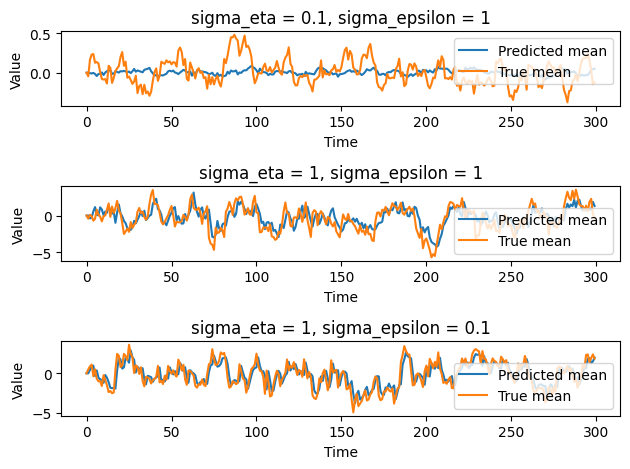

In [5]:
sigmas = [(0.1, 1), (1, 1), (1, 0.1)]

for i, (sigma_eta, sigma_epsilon) in enumerate(sigmas):
    # generate data
    eta = np.random.normal(0, sigma_eta, n) #generate the eta values 
    epsilon = np.random.normal(0, sigma_epsilon, n) #generate the epsilon values
    mu = np.zeros(n) #create an array for mu value full of 0s
    y = np.zeros(n) #create an array for y value full of 0s
    for t in range(n-1): #iteration of the AR(1) plus noise process
        mu[t+1] = phi * mu[t] + eta[t] 
        y[t+1] = mu[t+1] + epsilon[t+1]
    
    # run Kalman filter
    mu_pred = np.zeros(n)
    P = np.zeros(n)
    v = np.zeros(n)
    K = np.zeros(n)
    F = np.zeros(n)
    llk = np.zeros(n)
    
    P[1] = (sigma_eta**2)*(1-phi**2) 
    llk[1]=0
    
    for t in range(n-1):
        v[t]= y[t] - mu_pred[t]
        F[t] = P[t] + sigma_epsilon**2
        K[t] = (phi * P[t])/F[t]
        P[t+1] = phi**2 * P[t] + sigma_eta**2 -K[t]**2*F[t] 
        mu_pred[t+1] = phi * mu_pred[t] + K[t]*v[t]
        llk[t] = -0.5 *math.log(F[t] + (v[t]**2/F[t]))
    
    llk = sum(llk)
    print(f"The sum of the likelihood with the values of sigmas ({sigma_eta}, {sigma_epsilon}) is {llk:.4f}")
    # plot results
    plt.subplot(len(sigmas), 1, i+1)
    plt.plot(mu_pred, label='Predicted mean')
    plt.plot(mu, label='True mean')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'sigma_eta = {sigma_eta}, sigma_epsilon = {sigma_epsilon}')
plt.tight_layout()
plt.show()


b) Simulate the process in 1 with different distribution for a noise term, e.g. for a Student-t distribution with unite scale and varying values of the degrees of freedom $v = (3, 6, 12, 28, 200)$ and estimate the predicted signal $\mu_{t+1|t}$ using the
Kalman filter; 


Let's set the initial conditions

In [6]:
n = 100
phi_b = 0.8
sigma_xi = 1
sigma_epsilon = 1

Let's define the vector $v$ of the degree of freedoms and make a for loop for every $v_i$, then implement the model and run the Kalman filter

The sum of the likelihood with the degree of freedom (3) is -72.6922


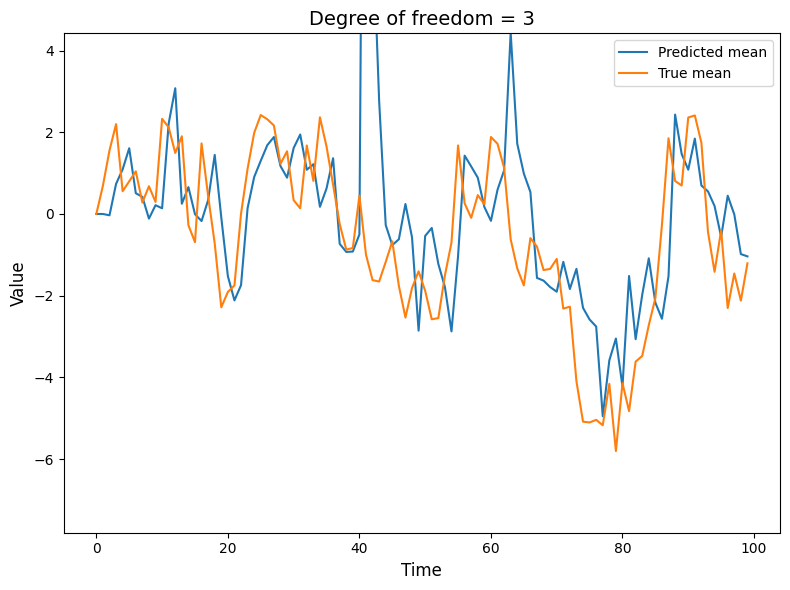

The sum of the likelihood with the degree of freedom (6) is -59.2797


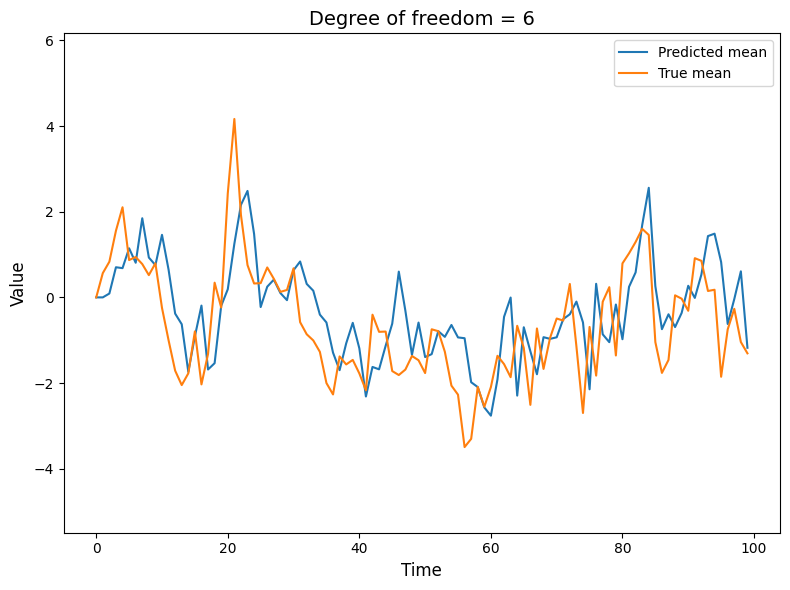

The sum of the likelihood with the degree of freedom (12) is -58.3092


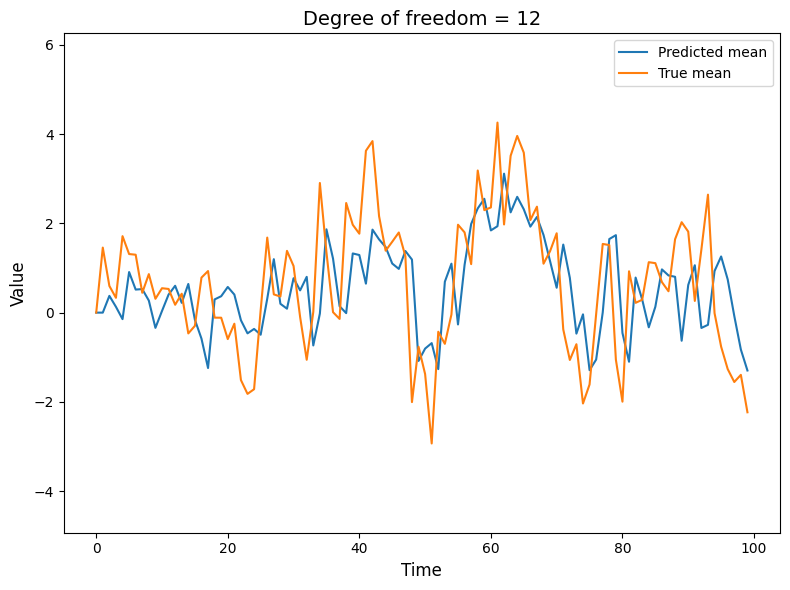

The sum of the likelihood with the degree of freedom (28) is -52.6642


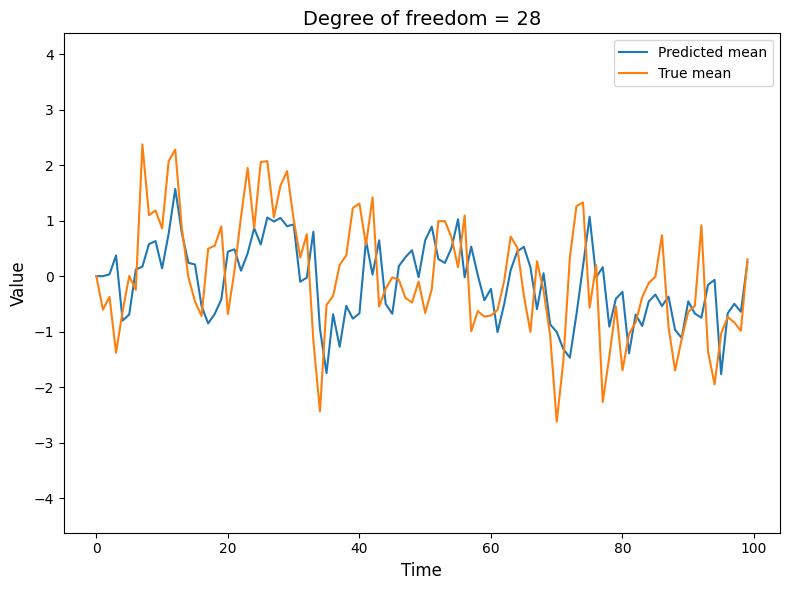

The sum of the likelihood with the degree of freedom (200) is -57.0512


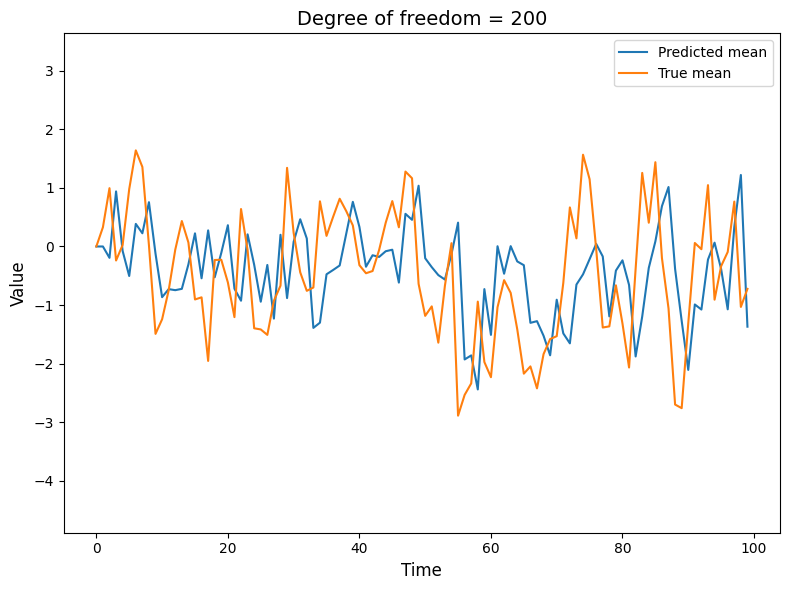

<Figure size 640x480 with 0 Axes>

In [7]:
v = [3, 6, 12, 28, 200]
for i in v:
    eta = np.random.normal(0, sigma_xi, n)*sigma_xi #in question 1 point b it's not clear the noise what it means
    epsilon = np.random.standard_t(i, size = n)*sigma_epsilon
    mu = np.zeros(n)
    y = np.zeros(n)
    for t in range(n-1):
        mu[t+1] = phi_b * mu[t] + eta[t] 
        y[t+1] = mu[t+1] + epsilon[t+1]
    # run Kalman filter
    mu_pred = np.zeros(n)
    P = np.zeros(n)
    v = np.zeros(n)
    K = np.zeros(n)
    F = np.zeros(n)
    llk = np.zeros(n)
    
    P[1] = (sigma_xi**2)*(1-phi**2)
    llk[1]=0
    
    for t in range(n-1):
        v[t]= y[t] - mu_pred[t]
        F[t] = P[t] + sigma_epsilon**2
        K[t] = (phi * P[t])/F[t]
        P[t+1] = phi**2 * P[t] + sigma_xi**2 -K[t]**2*F[t] 
        mu_pred[t+1] = phi * mu_pred[t] + K[t]*v[t]
        llk[t] = -0.5 *math.log(F[t] + (v[t]**2/F[t]))
    
    llk = sum(llk)
    print(f"The sum of the likelihood with the degree of freedom ({i}) is {llk:.4f}")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(x=np.arange(n), y=mu_pred, label='Predicted mean', ax=ax)
    sns.lineplot(x=np.arange(n), y=mu, label='True mean', ax=ax)
    ax.legend()
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'Degree of freedom = {i}', fontsize=14)
    ax.set_ylim(mu.min() - 2, mu.max() + 2)
    plt.tight_layout()
    plt.show()
plt.tight_layout()
plt.show()


Estimate the predicted signal $\mu_{t+1|t}$ using the Kalman filter for the LLM.

#### 2) 
Simulate a LLT model and estimate the predicted state $\alpha_{t+1|t}$ using the Kalman filter. 

Recall the LLT model:

$y_t = \mu_t + \epsilon_t$,  with $\epsilon_t \thicksim N(0, \sigma^2_{\epsilon})$

$\mu_{t+1} = \beta_t + \mu_t + \eta_t$,   with $\eta_t \thicksim N(0, \sigma_{\eta}^2)$

$\beta_{t+1} = \beta_t + \xi_t$,     with $\xi_t \thicksim N(0, \sigma_{\xi^2})$

It's possible to show that the LLT model can be casted in a state space form (Durbin and Koopman 2012, Chapter 3.2).

Let's define the first variables

In [8]:
n= 600

sigma_epsilon = 1
epsilon = np.random.normal(0, sigma_epsilon, size = n)

sigma_eta = 1
eta = np.random.normal(0, sigma_eta, size = n)

sigma_xi = 1
xi = np.random.normal(0, sigma_xi , size= n)



Simulation of the local linear trend

<function matplotlib.pyplot.show(close=None, block=None)>

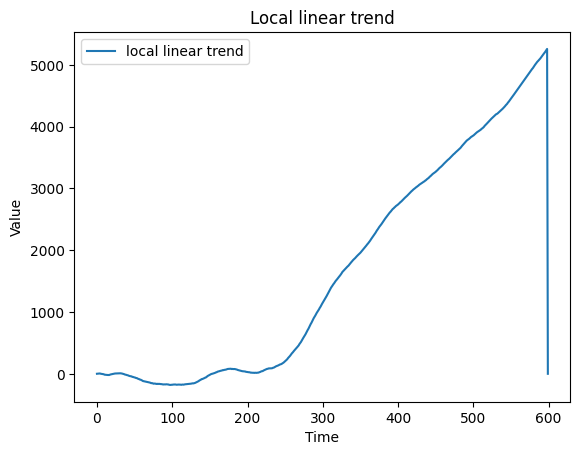

In [9]:
beta = np.zeros(n)
mu = np.zeros(n)
y = np.zeros(n)

for t in range(n-1):
    beta[t+1] = beta[t] + xi[t]
    mu[t+1] = beta[t] + mu[t] + eta[t]
    y[t] = mu[t] + epsilon[t]


plt.plot(y, label = "local linear trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Local linear trend")
plt.legend()
plt.show


State space representation and Kalman filter estimation

In [10]:
alpha = np.column_stack((mu, beta))
T = np.array([[1, 0], [1, 1]])
Z = np.array([[1, 0]])
H = np.array([[sigma_eta, 0], [0, sigma_xi]])
Q = 1
G = sigma_epsilon
alpha_pred = np.full((2, n), np.nan)
P = np.zeros((2,2))
v = np.zeros(n)
K = np.full((2,n),np.nan)
F = np.full(n, np.nan)



alpha_pred[:, 0] = [0, 0]
P = np.dot(H, H.T)


for t in range(n-1):
    v[t] = y[t]-alpha_pred[0,t]
    F[t] = np.dot(np.dot(Z, P), Z.T) + G**2
    K[:, t] = np.squeeze(np.dot(np.dot(T, P), Z.T)) * (1/F[t])
    P = np.dot(np.dot(T,P),T.T) + np.dot(H,H.T) - np.dot(K[:,t],K[:,t].T)*F[t]
    alpha_pred[:, t+1] = alpha_pred[:,t] + np.dot(K[:,t],v[t])



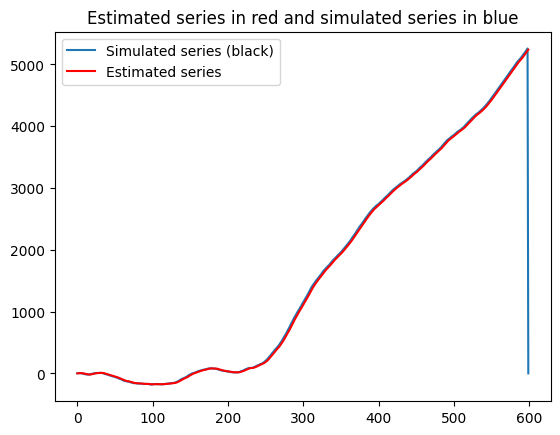

In [11]:
plt.plot(y, label="Simulated series (black)")
plt.plot(alpha_pred[0, :], color="red", label="Estimated series")
plt.title("Estimated series in red and simulated series in blue")
plt.legend()
plt.show()